Lista 5

Zadanie 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def autokowariancja(h, x):
    n = len(x)
    mean_x = np.mean(x)
    return 1/n * np.sum((x[:n-abs(h)] - mean_x) * (x[abs(h):] - mean_x))

In [4]:
def autokorelacja(h, x):
    return autokowariancja(h, x) / autokowariancja(0,x)

In [5]:
n = 1000
sigma_Z = 1
sigma_W = 0.5
theta = 2

In [6]:
def x_sample(n, sigma, theta):
    z = np.random.normal(0, sigma, n+1)
    x = np.zeros(n)
    for i in range(1,n+1):
        x[i-1] = z[i] + theta * z[i-1]
    return x

In [7]:
def y_sample(n, sigma_z, theta, sigma_w):
    x = x_sample(n, sigma_z, theta)
    w = np.random.normal(0, sigma_w, n)
    return x + w

In [8]:
def teo_autokow(h, sigma_z, sigma_w, theta):
    if h == 0:
        return sigma_z**2 * (theta**2 + 1) + sigma_w**2
    elif h == 1 or h == -1:
        return theta * sigma_z**2
    else:
        return 0

In [9]:
def teo_autokor(h, sigma_z, sigma_w, theta):
    if h == 0:
        return 1
    elif h == 1 or h == -1:
        return (sigma_z**2 * theta) / (sigma_z**2 * (1 + theta**2) + sigma_w**2)
    else:
        return 0

In [10]:
hs = np.arange(0,21,1)
autokow_emp, autokow_teo = [], []
autokor_emp, autokor_teo = [], []

In [11]:
y = y_sample(n, sigma_Z, theta, sigma_W)

In [56]:
for h in hs:
    autokow_emp.append(autokowariancja(h, y))
    autokow_teo.append(teo_autokow(h, sigma_Z, sigma_W, theta))
    autokor_emp.append(autokorelacja(h, y))
    autokor_teo.append(teo_autokor(h, sigma_Z, sigma_W, theta))

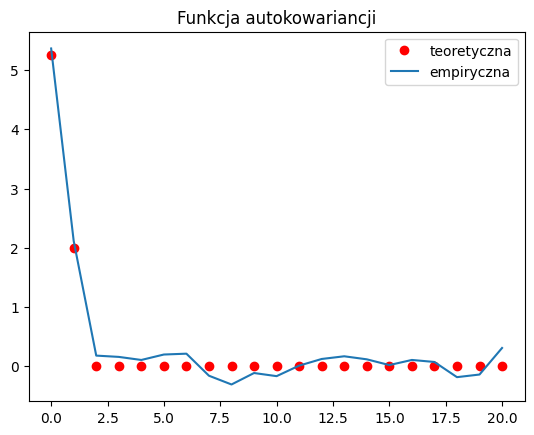

In [57]:
plt.plot(hs, autokow_teo, "ro", label="teoretyczna")
plt.plot(hs, autokow_emp, label="empiryczna")
plt.title("Funkcja autokowariancji")
plt.legend(loc="best")
plt.show()

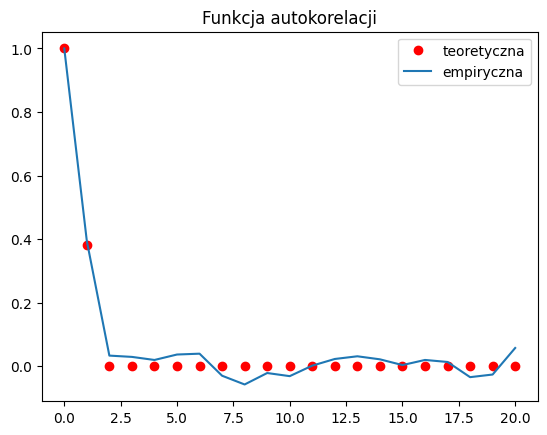

In [58]:
plt.plot(hs, autokor_teo, "ro", label="teoretyczna")
plt.plot(hs, autokor_emp, label="empiryczna")
plt.title("Funkcja autokorelacji")
plt.legend(loc="best")
plt.show()

Zadanie 4

In [43]:
sigma, theta = 0.5, 1
n = 1000

In [44]:
t = np.arange(1,11,0.01)
a1, a2 = 1.5, 5
b1, b2 = 2, 3

In [45]:
def ma1_sample(n, sigma, theta):
    z = np.random.normal(0, sigma, n+1)
    x = np.zeros(n)
    for i in range(1,n+1):
        x[i-1] = z[i] + theta * z[i-1]
    return x

In [46]:
x = ma1_sample(n, sigma, theta)

In [47]:
m_t = lambda t: a1 * t + a2
def s_t(t, b1, b2):
    return b1 * np.sin(b2 * t)

In [48]:
y = m_t(t) + s_t(t, b1, b2) + x

In [56]:
a1_dash, a2_dash = np.polyfit(t,y, 1)
y_dash = lambda t: a1_dash * t + a2_dash

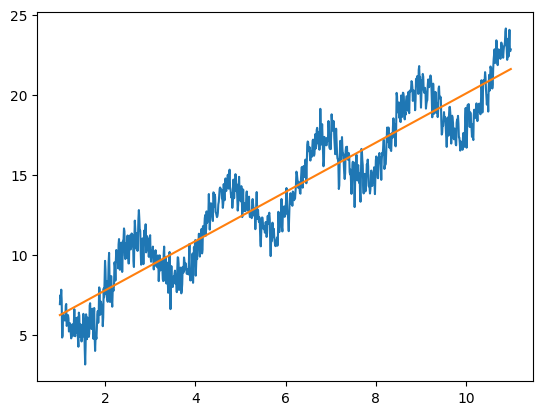

In [57]:
plt.plot(t, y)
plt.plot(t, y_dash(t))
plt.show()

In [50]:
y_star = y - y_dash(t)

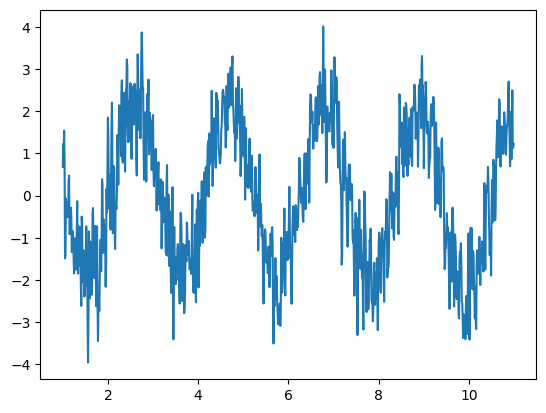

In [59]:
plt.plot(t, y_star)
plt.show()

In [51]:
from scipy.optimize import curve_fit

In [75]:
b1_dash, b2_dash = curve_fit(s_t, t, y_star,[max(y_star), 2*np.pi/2])[0]
y2_dash = lambda t: b1_dash * np.sin(b2_dash * t)

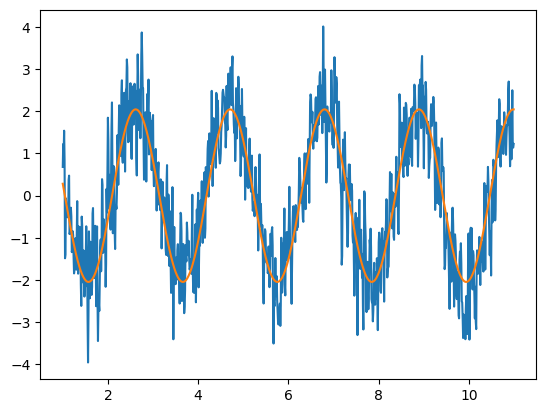

In [76]:
plt.plot(t, y_star)
plt.plot(t, y2_dash(t))
plt.show()

In [77]:
y_two_stars = y_star - y2_dash(t)

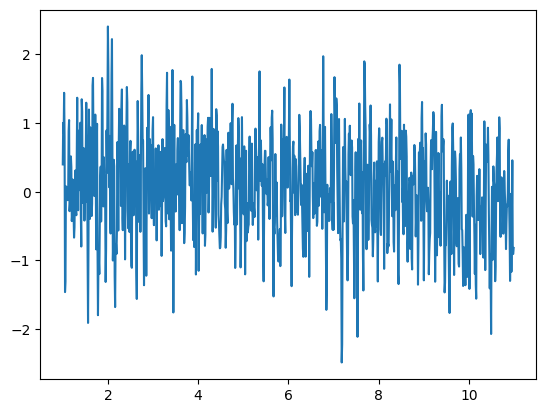

In [78]:
plt.plot(t, y_two_stars)
plt.show()

In [80]:
def ma1_teo_acf(h, theta):
    if h == 0:
        return 1
    elif h == 1 or h == -1:
        return theta / (1 + theta**2)
    else:
        return 0

In [86]:
hs = np.arange(0,11,1)

In [87]:
autokor_teo = [ma1_teo_acf(h, theta) for h in hs]
autokor_emp = [autokorelacja(h, y_two_stars) for h in hs]

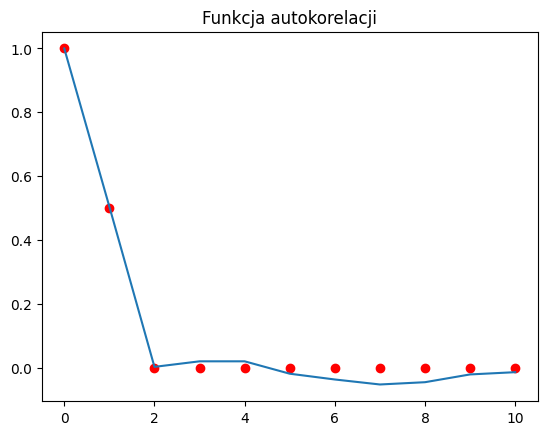

In [89]:
plt.plot(hs, autokor_teo, "ro")
plt.plot(hs, autokor_emp)
plt.title("Funkcja autokorelacji")
plt.show()